In [1]:
# Import libraries
import os  # For interacting with the file system
import shutil  # For managing files and directories in a cross-platform manner
import keras  # For building deep learning models
import numpy as np  # For numerical operations on arrays
from glob import glob  # For finding file paths
from tqdm import tqdm  # For progress bars

# Data preprocessing
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # For image data augmentation

# Data visualization
import seaborn as sns  # For statistical visualizations
import plotly.graph_objs as go  # For interactive visualizations
import matplotlib.pyplot as plt  # For creating static plots

# Model architecture
from keras import Sequential  # For building sequential models
from keras.models import load_model  # For loading pre-trained models
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout,MaxPooling2D,BatchNormalization  # For defining model layers

# Training callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping  # For training callbacks

# Pre-trained models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2  # For using pre-trained models
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# Set the path to the dataset
data_path = 'C:/Users/Admin/Videos/finalYrProject/dataset/raw-img'

# Get a list of class names from the data path
class_names = sorted(os.listdir(data_path))

# Count the number of classes
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['.git', 'cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 11


In [3]:
# Get the number of samples in each class
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [9, 4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


In [4]:
# to convert lists to dictionary **************
class_name_size = dict(zip(class_names, class_sizes))

In [5]:
class_name_size

{'.git': 9,
 'cane': 4863,
 'cavallo': 2623,
 'elefante': 1446,
 'farfalla': 2112,
 'gallina': 3098,
 'gatto': 1668,
 'mucca': 1866,
 'pecora': 1820,
 'ragno': 4821,
 'scoiattolo': 1862}

In [6]:
import plotly.graph_objects as go
import plotly.express as px

# Create data for the pie chart
labels = list(class_name_size.keys())
sizes = list(class_name_size.values())


# Defining bright and attractive colors for the interactive pie chart
attractive_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                     '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

# Creating the interactive pie chart with the specified attractive colors
fig = px.pie(
    names=labels,
    values=sizes,
    title='Class Distribution',
    color_discrete_sequence=attractive_colors
)

# Updating the layout of the chart to move the legend to the left and centering the title
fig.update_layout(
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="right",
        x=-0.1
    ),
    title={
        'text': 'Class Distribution',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    }
)

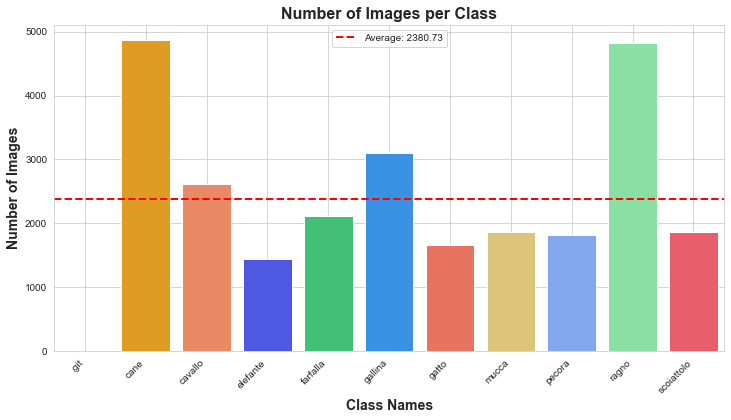

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Custom bright color palette
custom_palette = ['#ff4757', '#ffa502', '#ff7f50', '#3742fa', '#2ed573', 
                  '#1e90ff', '#ff6348', '#eccc68', '#70a1ff', '#7bed9f']

# Set the style of seaborn for more attractive graphs
sns.set_style("whitegrid")

# Set the size of the figure
plt.figure(figsize=(12,6))

# Plot a bar chart using the class names as the x-axis and class sizes as the y-axis
sns.barplot(x=class_names, y=class_sizes, palette=custom_palette) # 'viridis' is a perceptually uniform color palette

# Add a grid to the plot for better readability
plt.grid(True)

# Add a horizontal line to show the mean number of images across all classes
mean_value = np.mean(class_sizes)
plt.axhline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Average: {mean_value:.2f}")

# Enhance the readability of x and y labels
plt.xlabel("Class Names", fontsize=14, weight='bold')
plt.ylabel("Number of Images", fontsize=14, weight='bold')

# Rotate x labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a legend to the plot with a title
plt.legend(title="")

# Set the title of the graph
plt.title("Number of Images per Class", fontsize=16, weight='bold')

# Show the plot
plt.show()

In [8]:
np.min(class_sizes)

9

In [9]:
# Set the path to the directory where the sampled data will be saved
sampled_data_path = r'C:/Users/Admin/Videos/finalYrProject/sample-data'
# Create the sampled data directory if it doesn't exist
if not os.path.exists(sampled_data_path):
    os.mkdir(sampled_data_path)

# Set the percentage of each class to sample
sample_percent = 0.1

# Define a dictionary that maps the original class names to their English names
class_names_dict = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}



# Loop through each class directory and copy 2000 images or less to the sampled data directory
for class_name in os.listdir(data_path):
    if class_name.startswith('.'):
        continue
    # Get the path to the original class directory
    class_path = os.path.join(data_path, class_name)
    # Get the English name of the class
    class_name_en = class_names_dict[class_name]
    # Get the path to the sampled class directory
    sampled_class_path = os.path.join(sampled_data_path, class_name_en)
    # Create the sampled class directory and fill it up only if it doesn't exist ********
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
        # Get a list of all the image files in the class directory
        image_files = os.listdir(class_path)
        # Calculate the number of images to sample **************
        image_class_size = class_name_size[class_name]
        if image_class_size > 2000:
            num_images = 2000
        else:
            num_images = int(image_class_size)
        # Sample the images
        sampled_images = np.random.choice(image_files, size=num_images, replace=False)
        # Copy the sampled images to the sampled class directory
        for image_name in sampled_images:
            src_path = os.path.join(class_path, image_name)
            dst_path = os.path.join(sampled_class_path, image_name)
            shutil.copyfile(src_path, dst_path)

In [10]:
sampled_data_path = r'C:/Users/Admin/Videos/finalYrProject/sample-data'
# Get a list of class names from the sampled data directory
class_names = sorted(os.listdir(sampled_data_path))

# Get the number of samples in each class
class_sizes = []
for name in class_names:
    # Get the number of samples in the class directory
    class_size = len(os.listdir(os.path.join(sampled_data_path, name)))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [2000, 1668, 2000, 1866, 2000, 1446, 2000, 1820, 2000, 1862]


In [11]:
# Create the pie chart
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout and create the figure
layout = go.Layout(title='Balanced Class Distribution')
fig = go.Figure(data=[data], layout=layout)

# Show the figure
fig.show()

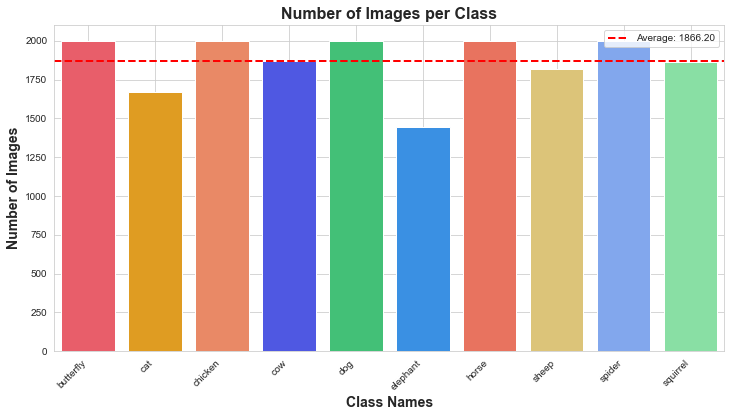

In [12]:
# Custom bright color palette
custom_palette = ['#ff4757', '#ffa502', '#ff7f50', '#3742fa', '#2ed573', 
                  '#1e90ff', '#ff6348', '#eccc68', '#70a1ff', '#7bed9f']

# Set the style of seaborn for more attractive graphs
sns.set_style("whitegrid")

# Set the size of the figure
plt.figure(figsize=(12,6))

# Plot a bar chart using the class names as the x-axis and class sizes as the y-axis
sns.barplot(x=class_names, y=class_sizes, palette=custom_palette) # 'viridis' is a perceptually uniform color palette

# Add a grid to the plot for better readability
plt.grid(True)

# Add a horizontal line to show the mean number of images across all classes
mean_value = np.mean(class_sizes)
plt.axhline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Average: {mean_value:.2f}")

# Enhance the readability of x and y labels
plt.xlabel("Class Names", fontsize=14, weight='bold')
plt.ylabel("Number of Images", fontsize=14, weight='bold')

# Rotate x labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a legend to the plot with a title
plt.legend(title="")

# Set the title of the graph
plt.title("Number of Images per Class", fontsize=16, weight='bold')

# Show the plot
plt.show()

In [13]:
# Initialize Generator with the specified image transformations and preprocessing
# rescale: normalizes pixel values from 0-255 to 0-1
# horizontal_flip: randomly flips images horizontally
# vertical_flip: randomly flips images vertically
# rotation_range: randomly rotates images by a given range in degrees
# validation_split: splits the data into training and validation sets, with 20% of the data used for validation
data_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

# Load training data from the specified directory and apply the generator
# target_size: resizes the images to a specified size
# class_mode: specifies the type of label encoding, binary for 2 classes
# batch_size: specifies the number of samples per batch
# shuffle: shuffles the data after each epoch
# subset: specifies the subset of data to load, in this case, the training set
train_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='training')

# Load validation data from the specified directory and apply the generator
# subset: specifies the subset of data to load, in this case, the validation set
valid_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='validation')

Found 14931 images belonging to 10 classes.
Found 3731 images belonging to 10 classes.


In [14]:
def show_image(image, image_title=None):
    '''
    This function takes in an image and an optional title and plots the image.
    '''
    # Display the image
    plt.imshow(image)
    
    # Set the title of the plot if provided
    plt.title(image_title)
    
    # Turn off the axes in the plot
    plt.axis('off')

In [15]:
def get_random_data(data_tuple):
    """
    Function to get a random data point from a given dataset.

    Args:
    data_tuple (tuple): A tuple containing the dataset images and labels as numpy arrays.

    Returns:
    A random image and its corresponding label as numpy arrays.
    """
    images, labels = data_tuple
    # get a random index for an image in the dataset
    idx = np.random.randint(len(images))

    # select the image and its corresponding label using the random index
    image, label = images[idx], labels[idx]

    # return the selected image and label
    return image, label

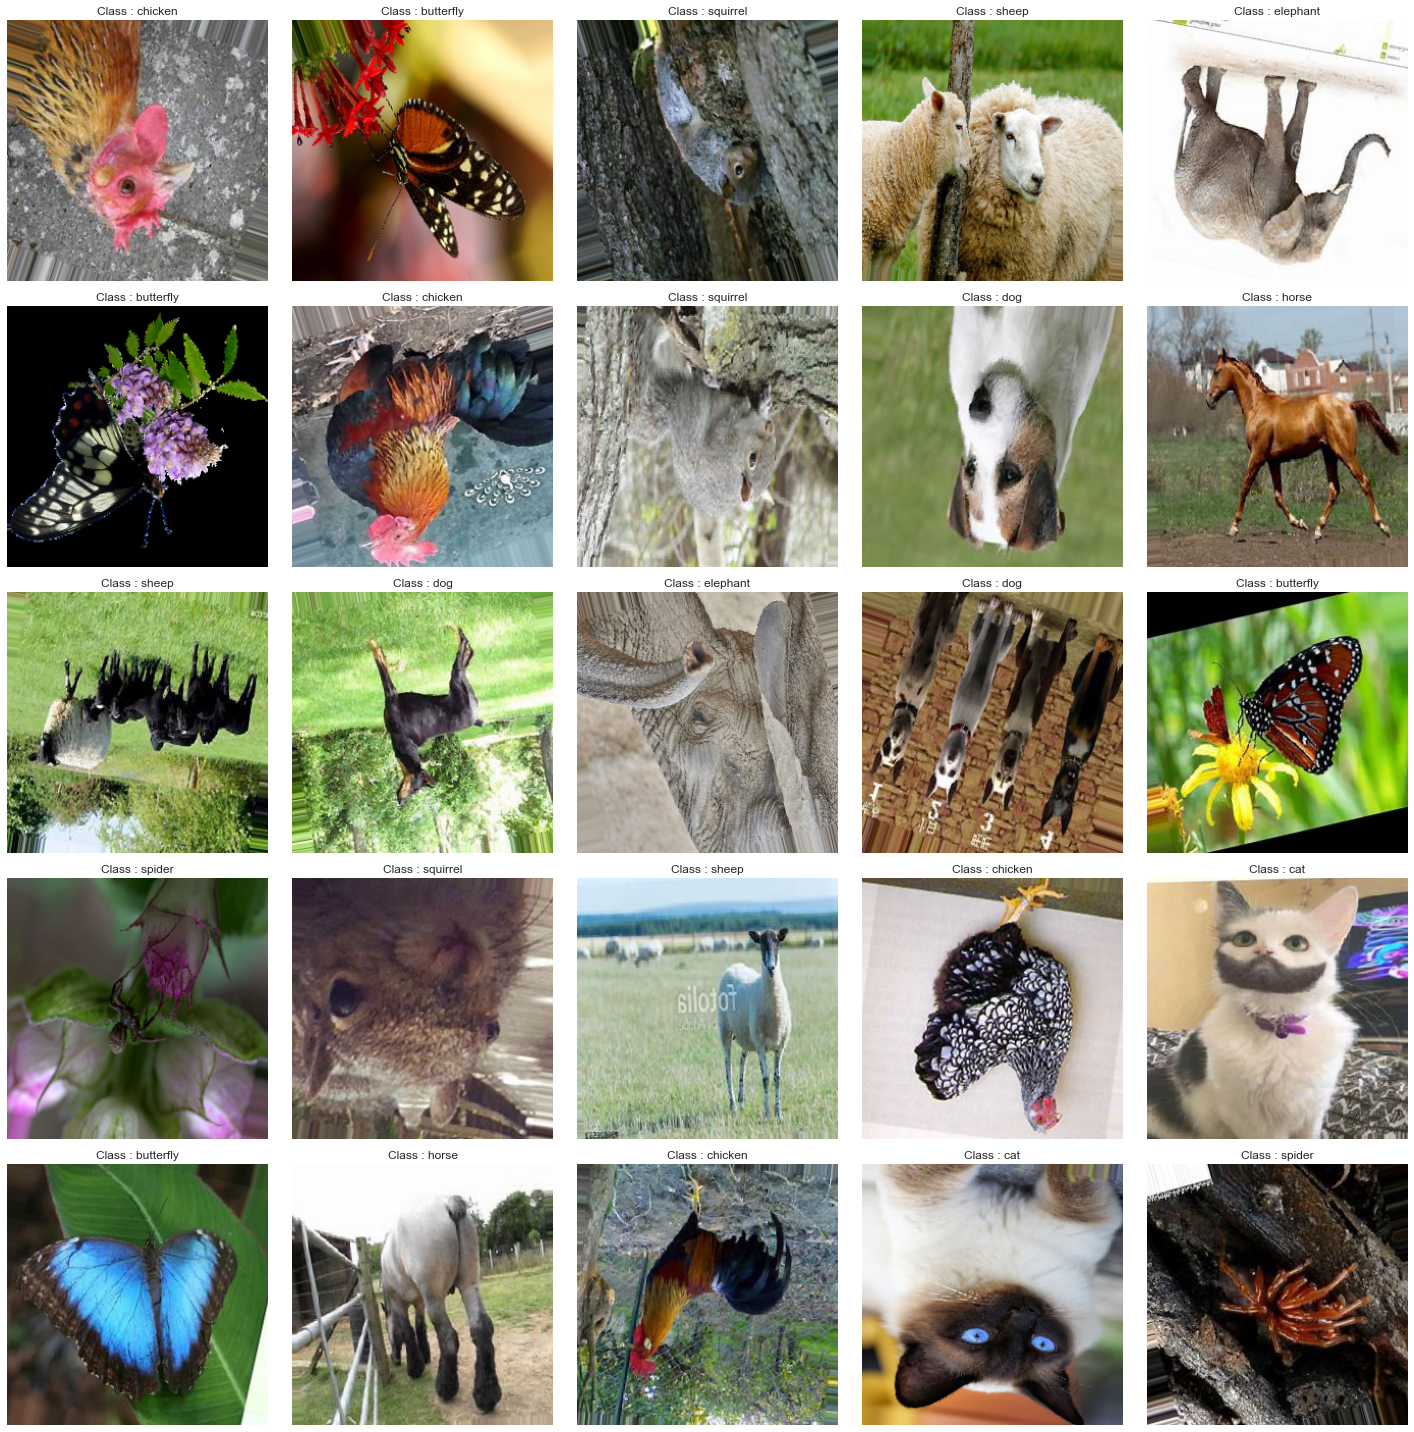

In [16]:
# Set the figure size for the plot
plt.figure(figsize=(20,20))

# Initialize a counter for the subplots
counter=1

# Loop over the train dataset
for images, labels in iter(train_data):
    
    # Get a random image and label
    image, label = get_random_data([images, labels])
    
    # Plot the image with its class name as the title
    plt.subplot(5,5,counter)
    show_image(image, image_title=f"Class : {class_names[int(label)]}")
    
    # Increment the counter
    counter+=1
    
    # End the loop when 25 images have been plotted
    if counter>=26: break

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [17]:
# Specify the name of the model as "ResNet152V2".
name = "ResNet152V2"

# Load the pre-trained ResNet152V2 model, freeze its weights and exclude its final classification layer.
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False

# Create a sequential model with the ResNet152V2 base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
resnet152V2 = Sequential([
    base_model,
    MaxPooling2D(pool_size=(2, 2)),  # Add Max Pooling with a 2x2 window
    BatchNormalization(),  # Add Batch Normalization
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
resnet152V2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cbs = [
    ModelCheckpoint(name + ".keras", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
history = resnet152V2.fit(
    train_data, validation_data=valid_data,
    epochs=4, callbacks=cbs
)

Epoch 1/4
467/467 [==============================] - 6160s 13s/step - loss: 0.4154 - accuracy: 0.8697 - val_loss: 0.2744 - val_accuracy: 0.9102
Epoch 2/4
467/467 [==============================] - 5493s 12s/step - loss: 0.2855 - accuracy: 0.9072 - val_loss: 0.2533 - val_accuracy: 0.9188
Epoch 3/4
467/467 [==============================] - 8850s 19s/step - loss: 0.2517 - accuracy: 0.9192 - val_loss: 0.2515 - val_accuracy: 0.9161
Epoch 4/4
467/467 [==============================] - 5266s 11s/step - loss: 0.2085 - accuracy: 0.9314 - val_loss: 0.2470 - val_accuracy: 0.9255


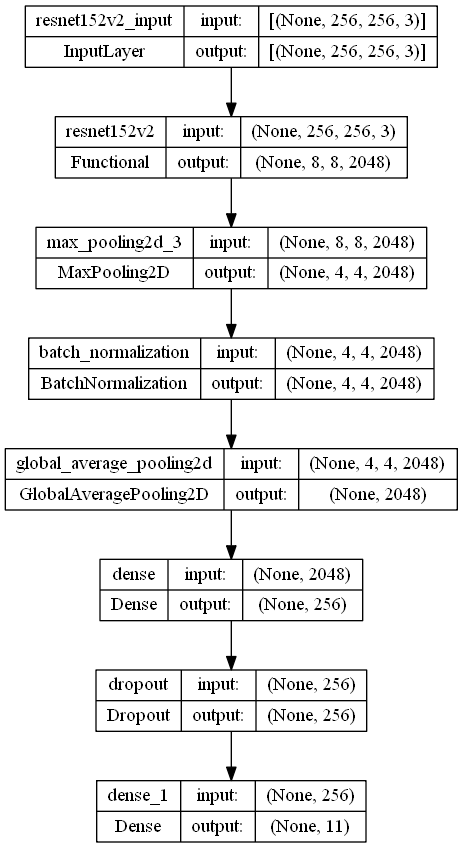

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(resnet152V2, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

117/117 [==============================] - 923s 8s/step - loss: 0.2488 - accuracy: 0.9166
Validation Loss: 0.24883724749088287, Validation Accuracy: 0.9166443347930908
117/117 [==============================] - 930s 8s/step


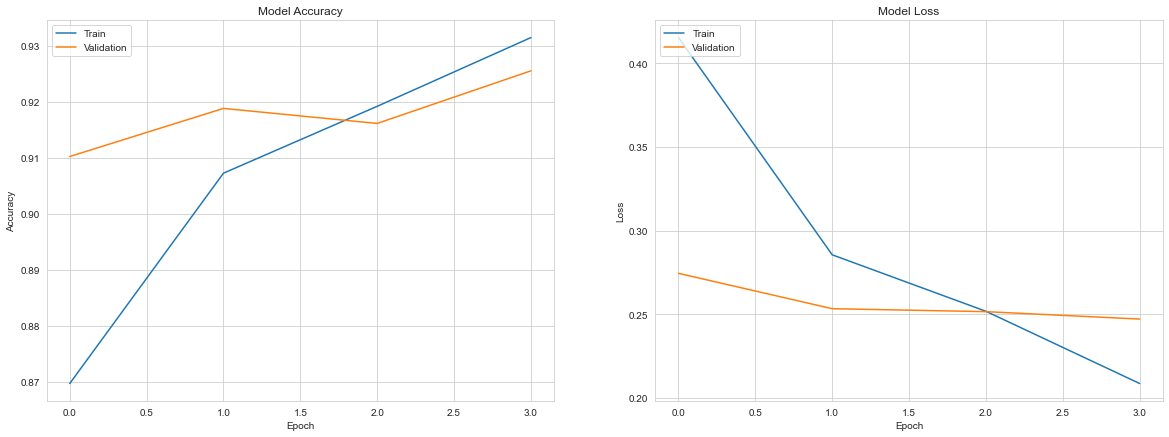

<Figure size 720x720 with 0 Axes>

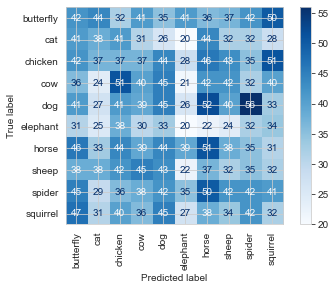

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Assuming `model` is your trained model and `validation_generator` is your validation data generator

# Evaluate the model to get loss and accuracy
val_loss, val_accuracy = resnet152V2.evaluate(valid_data, verbose=1)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Predict on the validation set
predictions = resnet152V2.predict(valid_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = valid_data.classes
class_labels = list(valid_data.class_indices.keys())

# Plotting training/validation loss and accuracy for bias-variance analysis
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    
    # Summarize history for accuracy
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')
    
    # Summarize history for loss
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

plot_training_history(history)  # Assuming 'history' is the history object returned by the model's fit method

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Process only the first batch from the validation data
for batch in valid_data:  # Iterate through the batches
    inputs, labels = batch
    preds = resnet152V2.predict(inputs)  # Get model predictions

    # Assuming it's a multiclass classification, take the argmax to get predicted classes
    preds = np.argmax(preds, axis=-1)

    y_true.extend(labels)  # Collect true labels
    y_pred.extend(preds)  # Collect predictions

    break  # Break after the first batch

# Convert collected true labels and predictions into numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate Precision, Recall, and F1 Score using 'macro' average for multiclass classification
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1/1 [==============================] - 10s 10s/step
Precision: 0.9416666666666667
Recall: 0.9416666666666667
F1 Score: 0.9416666666666667


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Initialize a counter for the number of batches processed
batches_processed = 0

# Iterate over the validation data
for batch in valid_data:
    inputs, labels = batch
    preds = resnet152V2.predict(inputs)  # Get model predictions

    # Assuming it's a multiclass classification, take the argmax to get predicted classes
    preds = np.argmax(preds, axis=-1)

    y_true.extend(labels)  # Collect true labels
    y_pred.extend(preds)  # Collect predictions

    # Increment the batch counter
    batches_processed += 1

    # Break out of the loop after processing 5 batches
    if batches_processed >= 10:
        break

# Convert collected true labels and predictions into numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate Precision, Recall, and F1 Score using 'macro' average for multiclass classification
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1/1 [==============================] - 7s 7s/step
Precision: 0.9308649577336372
Recall: 0.9315354401390517
F1 Score: 0.9295282036687291


In [22]:
# load model
model = load_model('ResNet152V2.keras')

In [23]:
model.summary()

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 2048)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 2048)       8192      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                       

In [24]:
# ************************************************************

In [25]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('ResNet152V2.keras')



In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'C:/Users/Admin/Videos/finalYrProject/dataset/raw-img/mucca/OIP-1b01PBRF9gYAQxQCGK6oKAAAAA.jpeg'  # Provide the path to your image
img = image.load_img(img_path, target_size=(256, 256))

# Convert the image to an array and preprocess it
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize the pixel values (assuming pixels are in the range [0, 255])

# Use the loaded model to make predictions
predictions = loaded_model.predict(x)

# Interpret the predictions
predicted_class_index = np.argmax(predictions)
predicted_class_probability = predictions[0][predicted_class_index]


def find_class(f):
    # Define your class mapping here based on your dataset classes
    
    class_mapping = {
        0: "butterfly",
        1: "cat",
        2: "chicken",
        3: "cow",
        4: "dog",
        5: "elephant",
        6: "horse",
        7: "sheep",
        8: "spider",
        9: "squirrel",
       
        # Add mappings for other classes
    }
    return class_mapping.get(f, "Unknown")

# Print the predicted class index and probability
# print("Predicted class index:", predicted_class_index)
# print(find_class(predicted_class_index))



1/1 [==============================] - 4s 4s/step


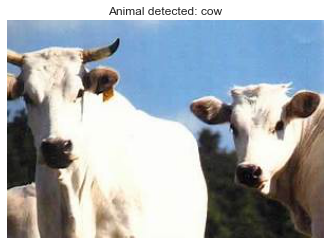

Predicted class probability: 0.99995553


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using the provided path
img_path = 'C:/Users/Admin/Videos/finalYrProject/dataset/raw-img/mucca/OIP-1b01PBRF9gYAQxQCGK6oKAAAAA.jpeg'  # Provide the path to your image

# Load the image
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis

# Display the given label
predicted_label = find_class(predicted_class_index)   #"Your_given_label"  # Provide the given label here
plt.title("Animal detected: {}".format(predicted_label))

plt.show()


print("Predicted class probability:", predicted_class_probability)